In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import collections
from bs4 import BeautifulSoup
from datetime import datetime

## **Unindo os datasets**

In [2]:
# bechdel_df = pd.read_csv('datasets/Bechdel_detailed.csv')
# links_df = pd.read_csv('datasets/movie-dataset/links.csv') # contém o id do imdb e tmdb de cada filme

# # remove colunas não usadas
# bechdel_df = bechdel_df.drop(['Unnamed: 0', 'submitterid', 'date', 'visible', 'id'], axis=1)

# # renomeia rating para não coincidir com o dos outros datasets
# bechdel_df = bechdel_df.rename(columns={'rating': 'bt_score'})

# # junta os 3 dataframes e descarta colunas duplicadas
# bechdel_df = pd.merge(bechdel_df, links_df, left_on='imdbid', right_on='imdbId', how='inner').drop(['imdbId', 'movieId'], axis=1)

# bechdel_df.head()

In [3]:
# bechdel_df = bechdel_df.sort_values(by=['bt_score', 'year'], ascending=[False, True]).reset_index(drop=True)
# bechdel_df.head()

## **Tratamento dos dados**

### **Retirada de nulos**

In [4]:
# bechdel_df.describe()

In [5]:
# data = bechdel_df.dropna().copy()

In [6]:
# data.describe()

### **Transformando tipos de dados**

In [7]:
# data['year'] = data['year'].astype('int')
# data['bt_score'] = data['bt_score'].astype('int')
# data['dubious'] = data['dubious'].astype('int')
# data['imdbid'] = data['imdbid'].astype('int')
# data['tmdbId'] = data['tmdbId'].astype('int')

### **API**

##### **Raspar dados dos filmes**

In [8]:
# data['genres'] = pd.NA
# data['popularity'] = pd.NA
# data['production_companies'] = pd.NA
# data['production_countries'] = pd.NA
# data['release_date'] = pd.NA
# data['revenue'] = pd.NA
# data['title'] = pd.NA
# data['vote_average'] = pd.NA
# data['vote_count'] = pd.NA
# data['cast'] = pd.NA
# data['crew'] = pd.NA

In [9]:
# api_key = 'b12a91c6b0aa37015f0b966b61efd74d'

# for index, row in data.iterrows():
#     try:
#         info = requests.get(f'https://api.themoviedb.org/3/movie/{row["tmdbId"]}?api_key={api_key}')
#         credits = requests.get(f'https://api.themoviedb.org/3/movie/{row["tmdbId"]}/credits?api_key={api_key}')
        
#         details = info.json()
#         details['cast'] = credits.json()['cast']
#         details['crew'] = credits.json()['crew']

#         data.loc[index, 'budget'] = details['budget']
#         data.loc[index, 'genres'] = str(details['genres'])
#         data.loc[index, 'popularity'] = details['popularity']
#         data.loc[index, 'production_companies'] = str(details['production_companies'])
#         data.loc[index, 'production_countries'] = str(details['production_countries'])
#         data.loc[index, 'release_date'] = details['release_date']
#         data.loc[index, 'revenue'] = details['revenue']
#         data.loc[index, 'title'] = details['title']
#         data.loc[index, 'vote_average'] = details['vote_average']
#         data.loc[index, 'vote_count'] = details['vote_count']
#         data.loc[index, 'cast'] = str(details['cast'])
#         data.loc[index, 'crew'] = str(details['crew'])
#     except:
#         print(row['tmdbId'])

# data.to_csv('api_data.csv')

In [10]:
data = pd.read_csv('api_data.csv', index_col=0)

data = data.dropna().copy()

data.head()

,title,year,bt_score,dubious,imdbid,tmdbId,genres,popularity,production_companies,production_countries,release_date,revenue,vote_average,vote_count,cast,crew,budget
0,Cinderella,1899,3,0,230,114108,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",3.762,"[{'id': 7159, 'logo_path': None, 'name': 'Star...","[{'iso_3166_1': 'FR', 'name': 'France'}]",1899-10-01,0.0,6.1,79.0,"[{'adult': False, 'gender': 2, 'id': 11523, 'k...","[{'adult': False, 'gender': 2, 'id': 11523, 'k...",0.0
1,Gretchen the Greenhorn,1916,3,0,6745,126925,[],1.942,[],[],1916-09-03,0.0,6.1,7.0,"[{'adult': False, 'gender': 1, 'id': 30779, 'k...","[{'adult': False, 'gender': 2, 'id': 42060, 'k...",0.0
2,Snow White,1916,3,0,7361,174598,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",0.817,[],[],1916-12-24,0.0,5.7,9.0,"[{'adult': False, 'gender': 0, 'id': 1658947, ...","[{'adult': False, 'gender': 2, 'id': 28968, 'k...",0.0
3,The Poor Little Rich Girl,1917,3,0,8443,95866,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",2.023,"[{'id': 13400, 'logo_path': None, 'name': 'Art...","[{'iso_3166_1': 'US', 'name': 'United States o...",1917-03-05,0.0,5.8,23.0,"[{'adult': False, 'gender': 1, 'id': 100047, '...","[{'adult': False, 'gender': 2, 'id': 13335, 'k...",0.0
4,Stella Maris,1918,3,0,9652,70753,"[{'id': 18, 'name': 'Drama'}]",1.310,"[{'id': 21540, 'logo_path': None, 'name': 'Mar...","[{'iso_3166_1': 'US', 'name': 'United States o...",1918-01-21,2400000.0,6.9,19.0,"[{'adult': False, 'gender': 1, 'id': 100047, '...","[{'adult': False, 'gender': 1, 'id': 34741, 'k...",0.0


#### **Tratamento das colunas**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7301 entries, 0 to 7634
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 7301 non-null   object 
 1   year                  7301 non-null   int64  
 2   bt_score              7301 non-null   int64  
 3   dubious               7301 non-null   int64  
 4   imdbid                7301 non-null   int64  
 5   tmdbId                7301 non-null   int64  
 6   genres                7301 non-null   object 
 7   popularity            7301 non-null   float64
 8   production_companies  7301 non-null   object 
 9   production_countries  7301 non-null   object 
 10  release_date          7301 non-null   object 
 11  revenue               7301 non-null   float64
 12  vote_average          7301 non-null   float64
 13  vote_count            7301 non-null   float64
 14  cast                  7301 non-null   object 
 15  crew                 

In [12]:
for index, movie in data.iterrows():
    genres = eval(movie['genres'])
    genres_list = []

    for genre in genres:
        genre_name = genre['name']
        genres_list.append(genre_name)

    data.at[index, 'genres'] = genres_list

In [13]:
for index, movie in data.iterrows():
    companies = eval(movie['production_companies'])
    companies_list = []

    for company in companies:
        company_name = company['name']
        companies_list.append(company_name)

    data.at[index, 'production_companies'] = companies_list

In [14]:
for index, movie in data.iterrows():
    countries = eval(movie['production_countries'])
    countries_list = []

    for country in countries:
        country_name = country['name']
        countries_list.append(country_name)

    data.at[index, 'production_countries'] = countries_list

In [15]:
for index, movie in data.iterrows():
    date = datetime.strptime(movie['release_date'], '%Y-%m-%d')
    reformatted_date = date.strftime('%d/%m/%Y')

    data.at[index, 'release_date'] = reformatted_date

In [16]:
data['cast_gender'] = pd.NA


for index, movie in data.iterrows():
    cast = eval(movie['cast'])
    gender_list = []

    for cast_member in cast:
        gender = cast_member['gender']
        gender_list.append(gender)

    data.at[index, 'cast_gender'] = gender_list

In [17]:
data['crew_gender'] = pd.NA


for index, movie in data.iterrows():
    crew = eval(movie['crew'])
    gender_list = []

    for crew_member in crew:
        gender = crew_member['gender']
        gender_list.append(gender)

    data.at[index, 'crew_gender'] = gender_list

In [18]:
# GENDER INFO
# 0: -
# 1: Feminino
# 2: Masculino
# 3: Não-binário


data['cast_female_representation'] = pd.NA
data['crew_female_representation'] = pd.NA


for index, movie in data.iterrows():
    if len(movie['cast_gender']) != 0:
        data.at[index, 'cast_female_representation'] = 100*(movie['cast_gender'].count(1)/len(movie['cast_gender']))

    if len(movie['crew_gender']) != 0:
        data.at[index, 'crew_female_representation'] = 100*(movie['crew_gender'].count(1)/len(movie['crew_gender']))


data = data.dropna().copy()
data['cast_female_representation'] = data['cast_female_representation'].astype('float64')
data['crew_female_representation'] = data['crew_female_representation'].astype('float64')

In [19]:
data.describe()

,year,bt_score,dubious,imdbid,tmdbId,popularity,revenue,vote_average,vote_count,budget,cast_female_representation,crew_female_representation
count,7279.000000,7279.000000,7279.000000,7.279000e+03,7279.000000,7279.000000,7.279000e+03,7279.000000,7279.000000,7.279000e+03,7279.000000,7279.000000
mean,1994.332051,2.106745,0.090809,9.139360e+05,71338.645968,18.684234,5.756087e+07,6.545569,1402.759445,1.812188e+07,27.367160,12.634757
std,23.330282,1.097980,0.287357,1.175348e+06,101324.323243,38.012652,1.423315e+08,0.836113,2683.199152,3.596806e+07,15.307702,12.344891
min,1878.000000,0.000000,0.000000,1.000000e+00,5.000000,0.600000,0.000000e+00,2.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,1985.000000,1.000000,0.000000,9.087300e+04,9921.000000,6.194000,0.000000e+00,6.000000,108.000000,0.000000e+00,16.196343,4.347826
50%,2003.000000,3.000000,0.000000,3.324520e+05,25476.000000,9.041000,2.503829e+06,6.600000,400.000000,1.500000e+06,25.714286,10.317460
75%,2011.000000,3.000000,0.000000,1.465051e+06,77930.500000,17.318500,4.804042e+07,7.100000,1395.000000,2.000000e+07,36.666667,17.647059
max,2020.000000,3.000000,1.000000,6.536944e+06,461615.000000,1608.867000,2.847246e+09,8.700000,31645.000000,3.800000e+08,100.000000,100.000000


In [20]:
data.head()

,title,year,bt_score,dubious,imdbid,tmdbId,genres,popularity,production_companies,production_countries,...,revenue,vote_average,vote_count,cast,crew,budget,cast_gender,crew_gender,cast_female_representation,crew_female_representation
0,Cinderella,1899,3,0,230,114108,"[Drama, Family, Fantasy, Romance]",3.762,"[Star-Film, Georges Méliès]",[France],...,0.0,6.1,79.0,"[{'adult': False, 'gender': 2, 'id': 11523, 'k...","[{'adult': False, 'gender': 2, 'id': 11523, 'k...",0.0,"[2, 0, 1, 0, 1, 0]","[2, 2, 2, 2]",33.333333,0.000000
1,Gretchen the Greenhorn,1916,3,0,6745,126925,[],1.942,[],[],...,0.0,6.1,7.0,"[{'adult': False, 'gender': 1, 'id': 30779, 'k...","[{'adult': False, 'gender': 2, 'id': 42060, 'k...",0.0,"[1, 2, 2, 2]","[2, 2, 2]",25.000000,0.000000
2,Snow White,1916,3,0,7361,174598,"[Fantasy, Drama]",0.817,[],[],...,0.0,5.7,9.0,"[{'adult': False, 'gender': 0, 'id': 1658947, ...","[{'adult': False, 'gender': 2, 'id': 28968, 'k...",0.0,"[0, 1, 2, 2, 0]",[2],20.000000,0.000000
3,The Poor Little Rich Girl,1917,3,0,8443,95866,"[Romance, Comedy, Drama, Fantasy]",2.023,[Artcraft Pictures Corporation],[United States of America],...,0.0,5.8,23.0,"[{'adult': False, 'gender': 1, 'id': 100047, '...","[{'adult': False, 'gender': 2, 'id': 13335, 'k...",0.0,"[1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 1]","[2, 2, 1, 1, 2, 2, 0]",38.461538,28.571429
4,Stella Maris,1918,3,0,9652,70753,[Drama],1.310,[Mary Pickford Company],[United States of America],...,2400000.0,6.9,19.0,"[{'adult': False, 'gender': 1, 'id': 100047, '...","[{'adult': False, 'gender': 1, 'id': 34741, 'k...",0.0,"[1, 1, 2, 2, 1, 0, 0, 2]","[1, 2, 2, 0, 2, 2]",37.500000,16.666667


In [21]:
# data.to_csv('cleaned_data.csv')

In [22]:
# data = pd.read_csv('cleaned_data.csv', index_col=0)
# data.head()

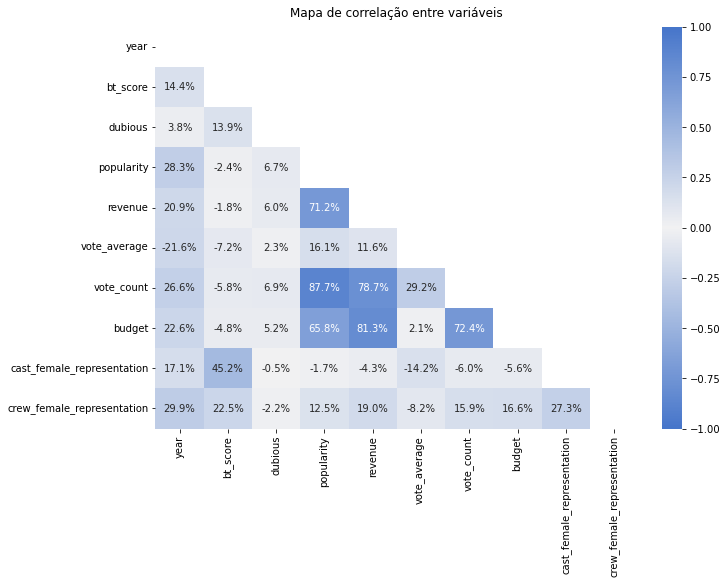

In [23]:
fig, axs = plt.subplots(figsize=(10, 8), constrained_layout=True)


def plot(axs, data, title):
    corr = data.corr(method='spearman')
    cmap = sns.diverging_palette(255, 255, sep=1, as_cmap=True)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    graph = sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt='.1%', cmap=cmap, mask=mask, ax=axs)
    graph.set_title(title, pad=10)


plot(axs, data.drop(['imdbid', 'tmdbId'], axis=1), 'Mapa de correlação entre variáveis')
plt.show()

## **Gráficos simples**

### **Filmes por nota no Teste de Bechdel**
**Métodos utilizados**
- `collections.Counter()`: conta os valores totais das notas de 0 a 3.
- `DataFrame.from_dict(data, orient='index')`: transforma um dicionário em DataFrame. `orient='index'` faz com que as keys do dicionário sejam usadas como index.

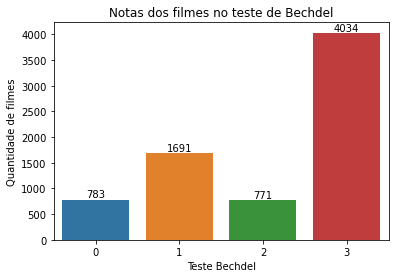

In [24]:
# TOTAL DE FILMES POR NOTA
# score_plot = sns.barplot(x='score', y='total', data=score_df)
score_plot = sns.barplot(x='index', y='bt_score', data=data.bt_score.value_counts().reset_index())
score_plot.bar_label(score_plot.containers[0])
score_plot.set(title='Notas dos filmes no teste de Bechdel')
plt.xlabel("Teste Bechdel")
plt.ylabel("Quantidade de filmes")
plt.show()

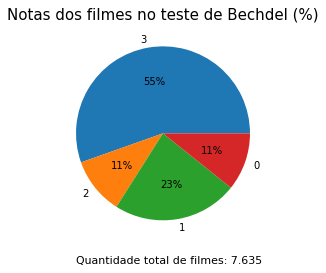

In [25]:
# PORCENTAGEM DOS FILMES
# score_df = df com a quantidade de filmes por nota.
score_df = collections.Counter(data.bt_score)
score_df = pd.DataFrame.from_dict(score_df, orient='index').reset_index()
score_df = score_df.rename(columns={'index': 'score', 0: 'total'})
plt.pie(score_df.total, labels = score_df.score.to_list(), autopct='%.0f%%')
score_df.score.to_list()
plt.text(-1, -1.5, "Quantidade total de filmes: 7.635", fontsize=11)
plt.title("Notas dos filmes no teste de Bechdel (%)", fontsize=15)
plt.show()

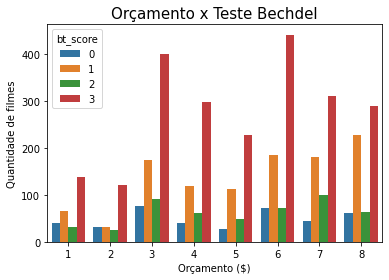

In [26]:
budget_df = data.loc[data['budget'] > 0].copy()

budget_df['Orçamento'] = pd.NA

for index, row in budget_df.iterrows():
    orçamento = 0
    if row['budget'] <= 500000:
        orçamento += 1
    if row['budget'] <= 1000000 and row['budget'] > 500000:
        orçamento += 2
    if row['budget'] <= 5000000 and row['budget'] > 1000000:
        orçamento += 3
    if row['budget'] <= 10000000 and row['budget'] > 5000000:
        orçamento += 4
    if row['budget'] <= 15000000 and row['budget'] > 10000000:
        orçamento += 5
    if row['budget'] <= 30000000 and row['budget'] > 15000000:
        orçamento += 6
    if row['budget'] <= 60000000 and row['budget'] > 30000000:
        orçamento += 7
    if row['budget'] > 60000000:
        orçamento += 8
    budget_df.loc[index, 'Orçamento'] = orçamento

sns.countplot(x ='Orçamento', hue = 'bt_score', data = budget_df)
plt.title("Orçamento x Teste Bechdel", fontsize=15)
plt.xlabel("Orçamento ($)")
plt.ylabel("Quantidade de filmes")
plt.show()

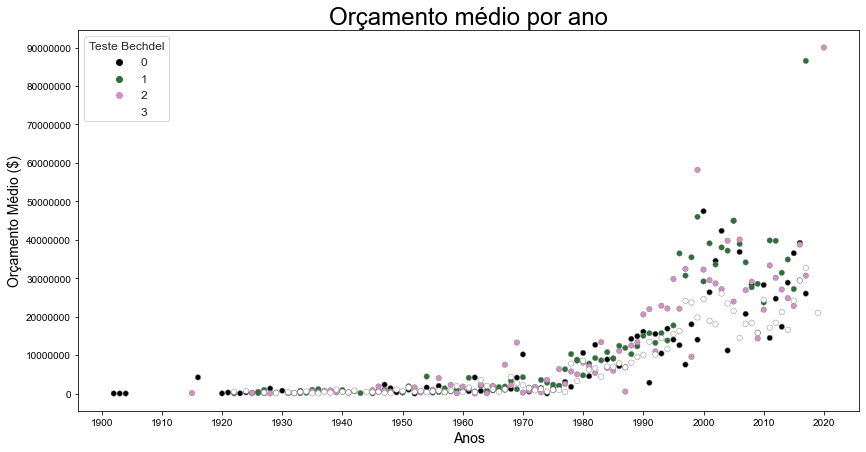

In [27]:
budget_year_mean = data.groupby(['year', 'bt_score'])['budget'].mean().to_frame().reset_index()
budget_year_mean1 = budget_year_mean[budget_year_mean['budget'] > 0]
budget_year_mean2 = budget_year_mean1[budget_year_mean1['year'] >= 1902]
fig, ax = plt.subplots(figsize = (14 , 7))
sns.set_theme(style="ticks")
sns.set_style("white")
sns.scatterplot(y = 'budget', x = 'year', hue = 'bt_score', data=budget_year_mean2, palette="cubehelix", s = 30, edgecolor=".5")
plt.legend(title = "Teste Bechdel", fontsize = '12', title_fontsize = "12")
ax.set_xlabel("Anos", size = 14) 
ax.set_ylabel("Orçamento Médio ($)", size = 14) 
ax.set_title("Orçamento médio por ano", size = 24) 
ax.set_xticks([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
ax.set_yticks([0, 10000000, 20000000, 30000000, 40000000, 50000000, 60000000, 70000000, 80000000, 90000000])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

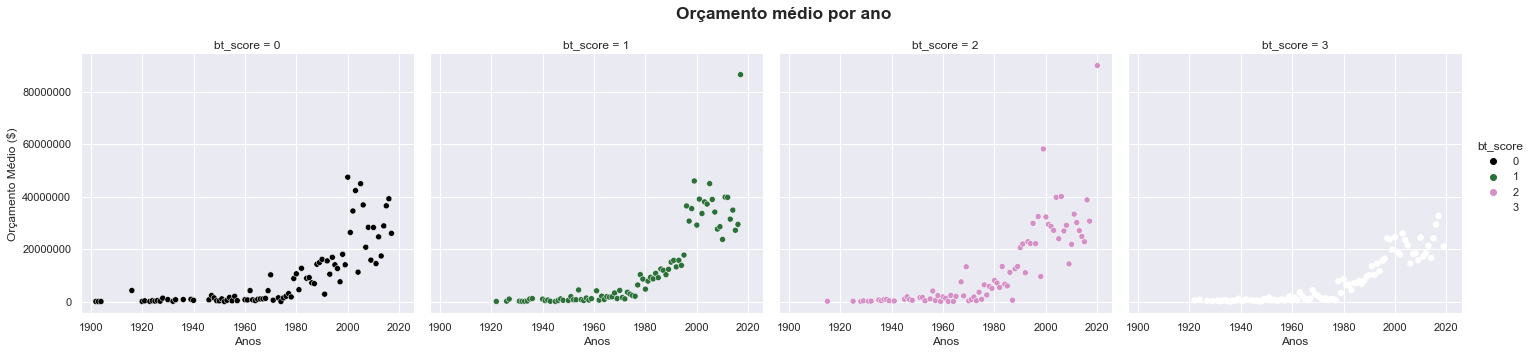

In [28]:
sns.set( rc = {'figure.figsize': (60, 60), 'axes.labelsize': 12}) 
g = sns.relplot(data = budget_year_mean2, x = "year",  y = "budget", col = "bt_score", hue = "bt_score", palette="cubehelix") 
g.fig.suptitle("Orçamento médio por ano", fontsize = 'x-large', fontweight = 'bold') 
g.fig.subplots_adjust(top = 0.85) 
g.set_axis_labels("Anos" , "Orçamento Médio ($)") 
plt.ticklabel_format(style='plain', axis='y')
plt.show()

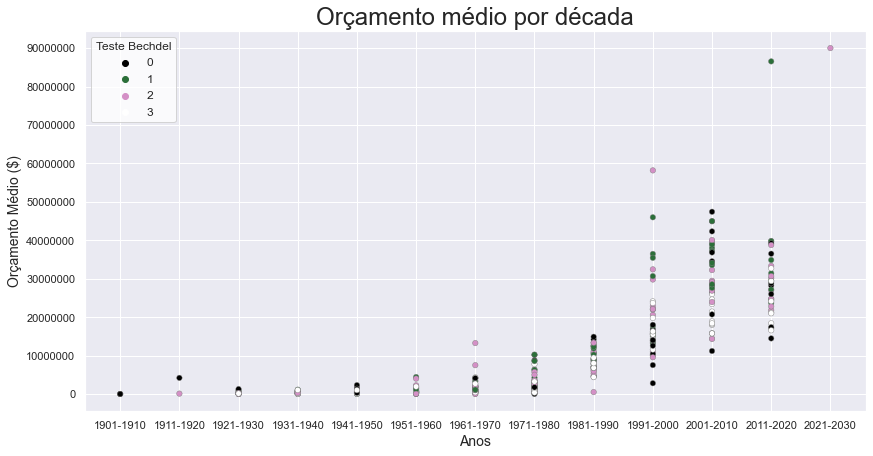

In [29]:
budget_interval_mean = data.groupby(['year', 'bt_score'])['budget'].mean().to_frame().reset_index()
budget_interval_mean1 = budget_interval_mean[budget_interval_mean['budget'] > 0]
budget_interval_mean2 = budget_interval_mean1[budget_interval_mean1['year'] >= 1902]

for index, year in budget_interval_mean2['year'].iteritems():
    interval_start = int(year - year % 10 + 1)
    interval_end = int(interval_start + 9)
    budget_interval_mean2.at[index, 'year_interval'] = str(interval_start) + '-' + str(interval_end)
    
fig, ax = plt.subplots(figsize = (14 , 7))
sns.set_theme(style="ticks")
sns.set_style("white")
sns.scatterplot(y = 'budget', x = 'year_interval', hue = 'bt_score', data=budget_interval_mean2, palette="cubehelix", s = 30, edgecolor=".5")
plt.legend(title = "Teste Bechdel", fontsize = '12', title_fontsize = "12")
ax.set_xlabel("Anos", size = 14) 
ax.set_ylabel("Orçamento Médio ($)", size = 14) 
ax.set_title("Orçamento médio por década", size = 24) 
ax.set_yticks([0, 10000000, 20000000, 30000000, 40000000, 50000000, 60000000, 70000000, 80000000, 90000000])
plt.ticklabel_format(style='plain', axis='y')

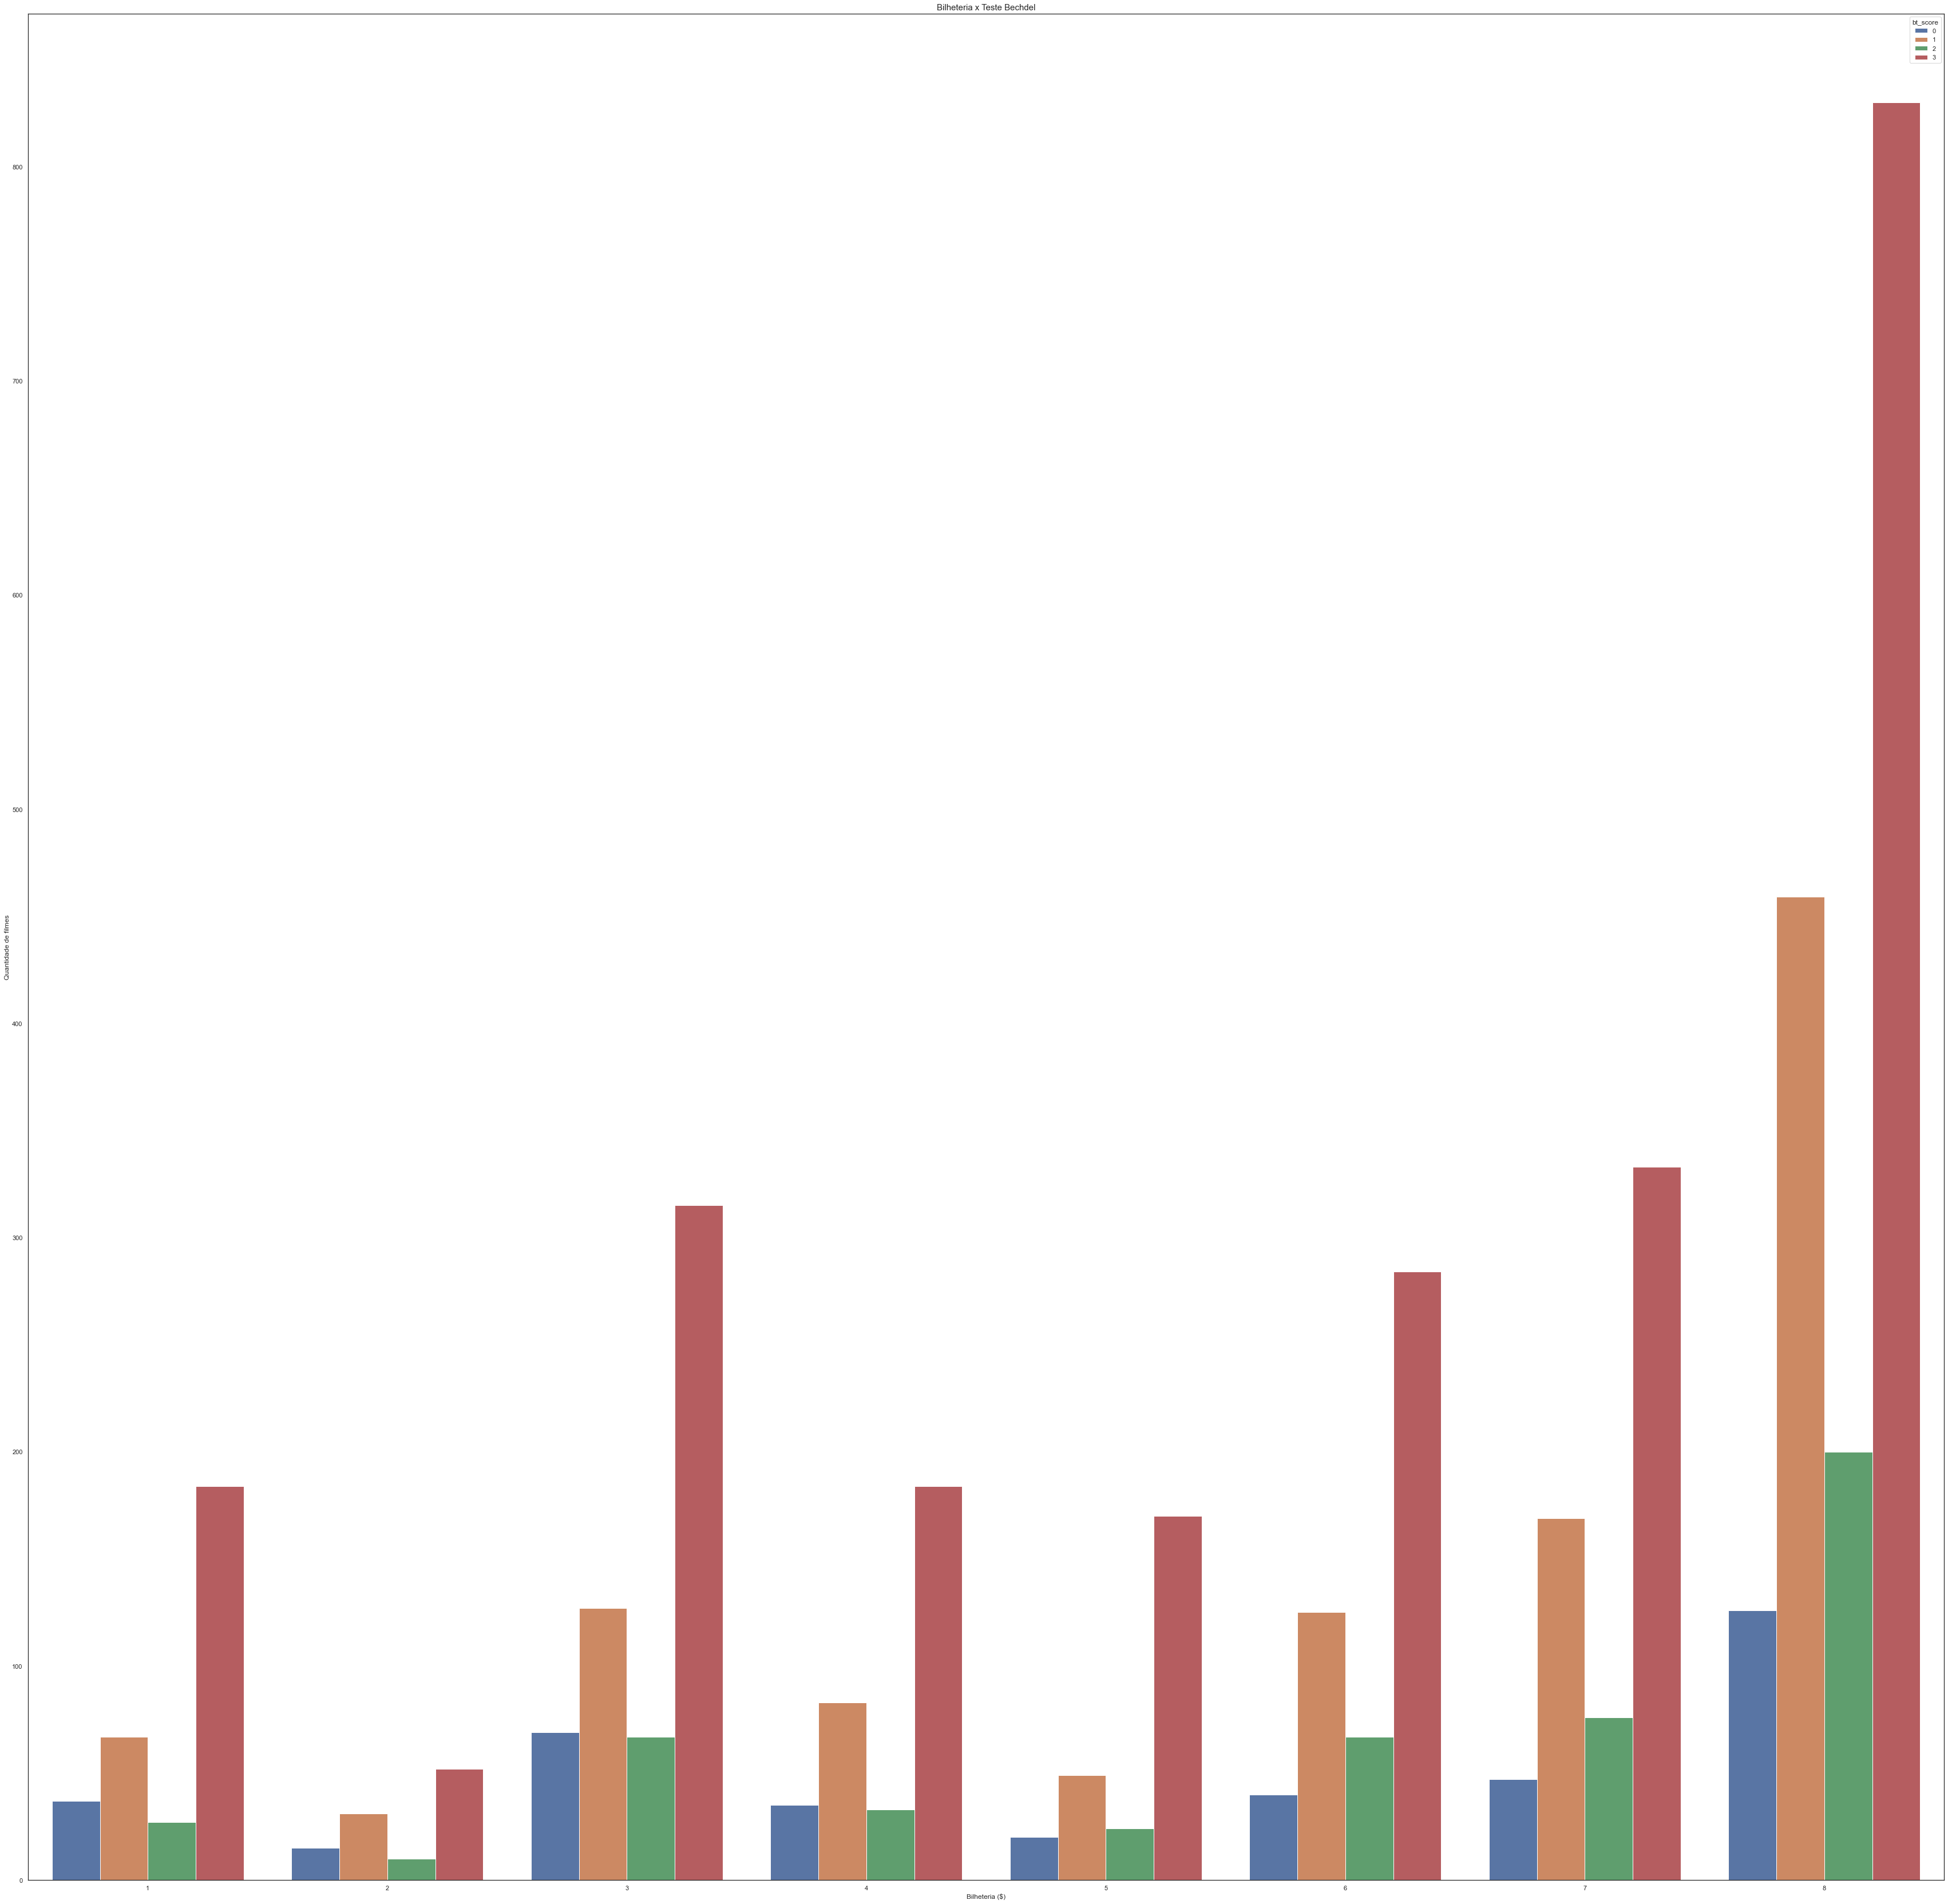

In [30]:
revenue_df = data.loc[data['revenue'] > 0].copy()

revenue_df['Bilheteria'] = pd.NA

for index, row in revenue_df.iterrows():
    bilheteria = 0
    if row['revenue'] <= 500000:
        bilheteria += 1
    if row['revenue'] <= 1000000 and row['revenue'] > 500000:
        bilheteria += 2
    if row['revenue'] <= 5000000 and row['revenue'] > 1000000:
        bilheteria += 3
    if row['revenue'] <= 10000000 and row['revenue'] > 5000000:
        bilheteria += 4
    if row['revenue'] <= 15000000 and row['revenue'] > 10000000:
        bilheteria += 5
    if row['revenue'] <= 30000000 and row['revenue'] > 15000000:
        bilheteria += 6
    if row['revenue'] <= 60000000 and row['revenue'] > 30000000:
        bilheteria += 7
    if row['revenue'] > 60000000:
        bilheteria += 8
    revenue_df.loc[index, 'Bilheteria'] = bilheteria

sns.countplot(x ='Bilheteria', hue = 'bt_score', data = revenue_df)
plt.title("Bilheteria x Teste Bechdel", fontsize=15)
plt.xlabel("Bilheteria ($)")
plt.ylabel("Quantidade de filmes")
plt.show()

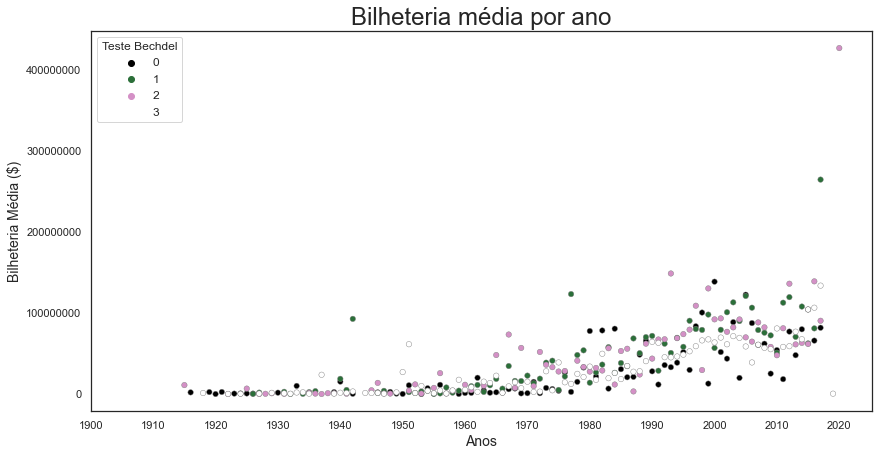

In [31]:
revenue_year_mean = data.groupby(['year', 'bt_score'])['revenue'].mean().to_frame().reset_index()
revenue_year_mean1 = revenue_year_mean[revenue_year_mean['revenue'] > 0]
revenue_year_mean2 = revenue_year_mean1[revenue_year_mean1['year'] >= 1902]
fig, ax = plt.subplots(figsize = (14 , 7))
sns.set_theme(style="ticks")
sns.set_style("white")
sns.scatterplot(y = 'revenue', x = 'year', hue = 'bt_score', data=revenue_year_mean2, palette="cubehelix", s = 30, edgecolor=".5")
plt.legend(title = "Teste Bechdel", fontsize = '12', title_fontsize = "12")
ax.set_xlabel("Anos", size = 14) 
ax.set_ylabel("Bilheteria Média ($)", size = 14) 
ax.set_title("Bilheteria média por ano", size = 24) 
ax.set_xticks([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

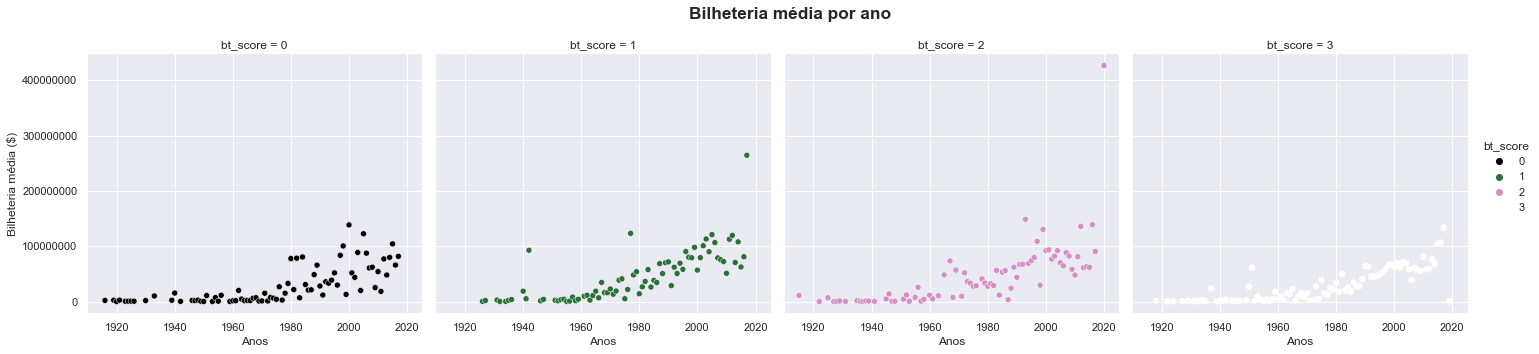

In [32]:
sns.set( rc = {'figure.figsize': (60, 60), 'axes.labelsize': 12}) 
g = sns.relplot(data = revenue_year_mean2, x = "year",  y = "revenue", col = "bt_score", hue = "bt_score", palette="cubehelix") 
g.fig.suptitle("Bilheteria média por ano", fontsize = 'x-large', fontweight = 'bold') 
g.fig.subplots_adjust(top = 0.85) 
g.set_axis_labels("Anos" , "Bilheteria média ($)") 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

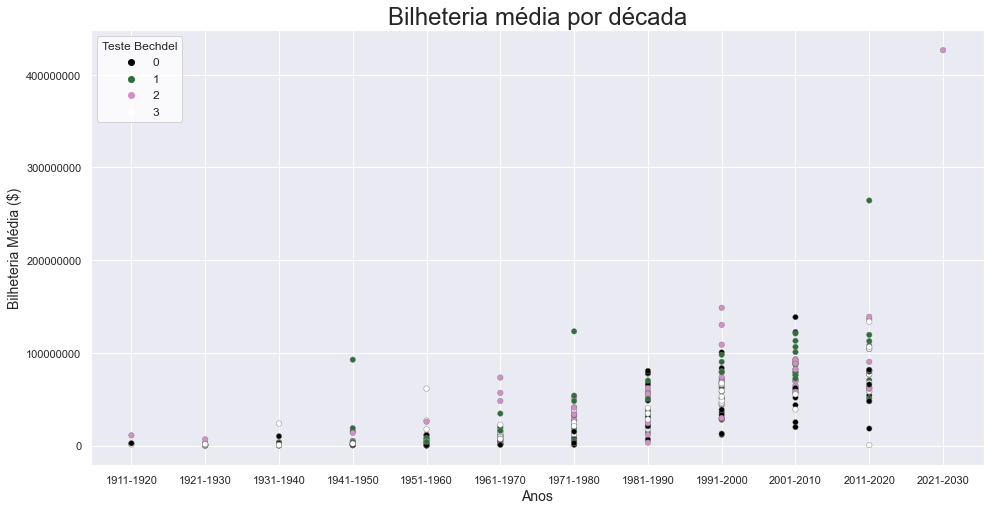

In [33]:
revenue_interval_mean = data.groupby(['year', 'bt_score'])['revenue'].mean().to_frame().reset_index()
revenue_interval_mean1 = revenue_interval_mean[revenue_interval_mean['revenue'] > 0]
revenue_interval_mean2 = revenue_interval_mean1[revenue_interval_mean1['year'] >= 1902]

for index, year in revenue_interval_mean2['year'].iteritems():
    interval_start = int(year - year % 10 + 1)
    interval_end = int(interval_start + 9)
    revenue_interval_mean2.at[index, 'year_interval'] = str(interval_start) + '-' + str(interval_end)
    
fig, ax = plt.subplots(figsize = (16 , 8))
sns.set_theme(style="ticks")
sns.set_style("white")
sns.scatterplot(y = 'revenue', x = 'year_interval', hue = 'bt_score', data=revenue_interval_mean2, palette="cubehelix", s = 30, edgecolor=".5")
plt.legend(title = "Teste Bechdel", fontsize = '12', title_fontsize = "12")
ax.set_xlabel("Anos", size = 14) 
ax.set_ylabel("Bilheteria Média ($)", size = 14) 
ax.set_title("Bilheteria média por década", size = 24) 
plt.ticklabel_format(style='plain', axis='y')
plt.show()

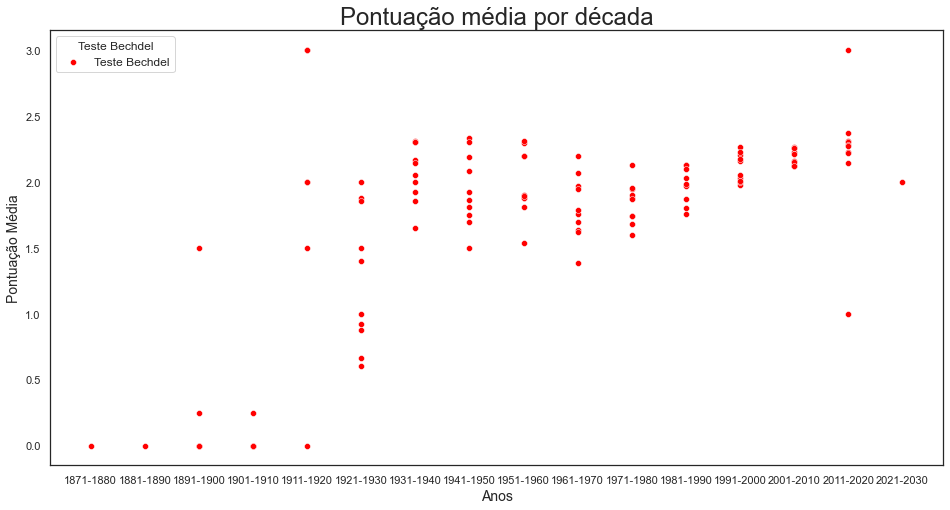

In [34]:
bechdel_year_mean = data.groupby(['year'])['bt_score'].mean().to_frame().reset_index()
for index, year in bechdel_year_mean['year'].iteritems():
    interval_start = int(year - year % 10 + 1)
    interval_end = int(interval_start + 9)
    bechdel_year_mean.at[index, 'year_interval'] = str(interval_start) + '-' + str(interval_end)
fig, ax = plt.subplots(figsize = (16 , 8))
sns.set_style("white")
sns.scatterplot(data=bechdel_year_mean, x="year_interval", y="bt_score", color = "red", ci=None)
plt.legend(labels = ['Teste Bechdel'], title = "Teste Bechdel", fontsize = '12', title_fontsize = "12")
ax.set_xlabel("Anos", size = 14) 
ax.set_ylabel("Pontuação Média", size = 14) 
ax.set_title("Pontuação média por década", size = 24)
plt.show()

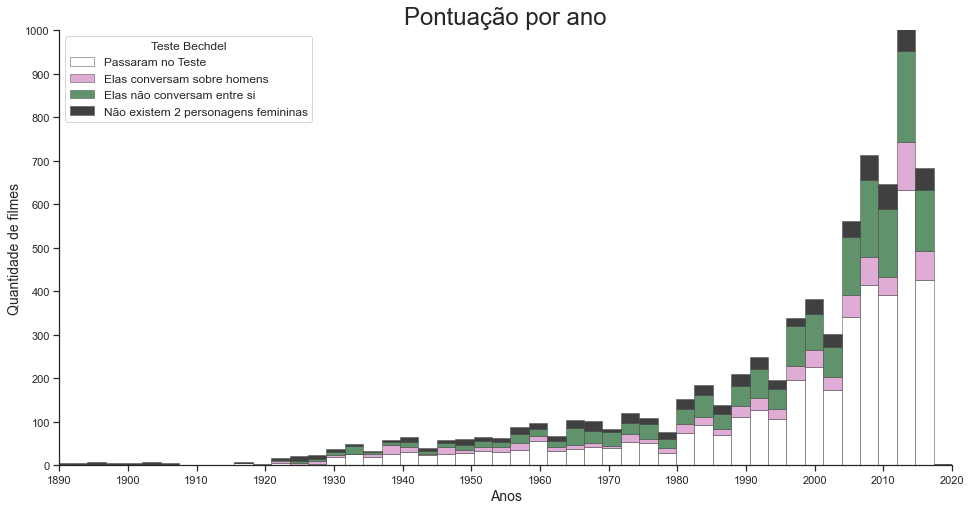

In [35]:
import matplotlib as mpl
    
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(16, 8))
sns.despine(f)
sns.histplot(data, x="year", hue="bt_score", multiple="stack", palette="cubehelix", edgecolor=".3", linewidth=.5)
plt.legend(labels = ["Passaram no Teste", "Elas conversam sobre homens", "Elas não conversam entre si", "Não existem 2 personagens femininas"], 
           title = "Teste Bechdel", fontsize = '12', title_fontsize = "12")
ax.set_xlabel("Anos", size = 14) 
ax.set_ylabel("Quantidade de filmes", size = 14) 
ax.set_title("Pontuação por ano", size = 24) 
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
ax.set_yticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
ax.set_xlim(1890, 2020)
ax.set_ylim(0, 1000)
plt.show()

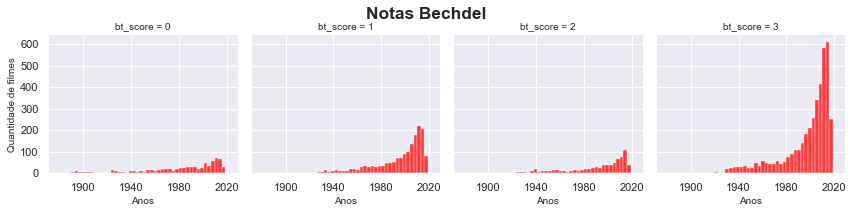

In [36]:
sns.set_theme(style="darkgrid")
sns.set( rc = {'figure.figsize': (60, 60), 'axes.labelsize': 10}) 
g = sns.displot(data, x="year", col="bt_score", binwidth=3, height=3, facet_kws=dict(margin_titles=True), color = 'red')
g.set(xticks=(1900, 1940, 1980, 2020), yticks=(0, 100, 200, 300, 400, 500, 600))
g.fig.suptitle("Notas Bechdel", fontsize = 'x-large', fontweight = 'bold') 
g.fig.subplots_adjust(top = 0.85) 
g.set_axis_labels("Anos" , "Quantidade de filmes")
plt.show()

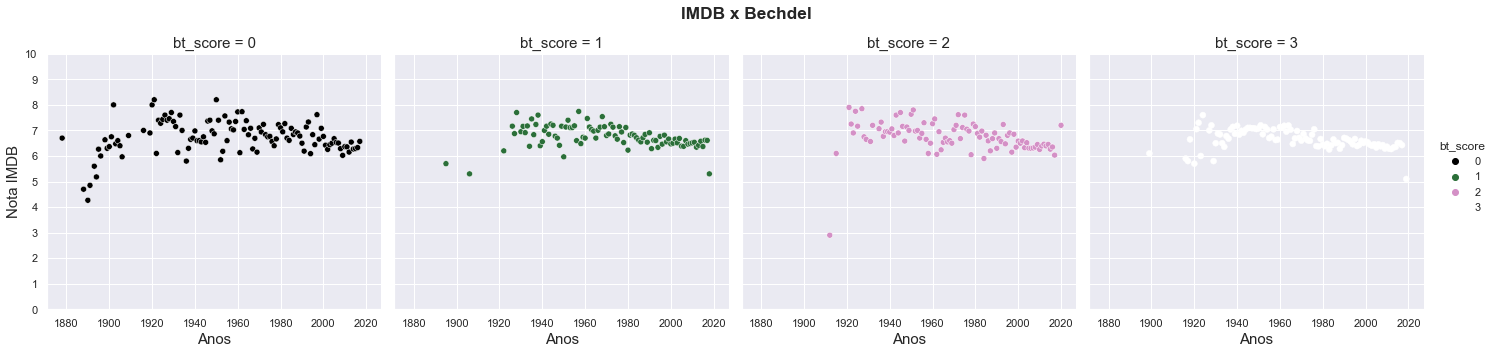

In [37]:
imdb_bechdel = data.groupby(['year', 'bt_score'])['vote_average'].mean().to_frame().reset_index()
sns.set( rc = {'figure.figsize': (60, 60), 'axes.labelsize': 15}) 
g = sns.relplot(data = imdb_bechdel, x = "year",  y = "vote_average", col = "bt_score", hue = "bt_score", palette="cubehelix") 
g.fig.suptitle("IMDB x Bechdel", fontsize = 'x-large', fontweight = 'bold') 
g.fig.subplots_adjust(top = 0.85) 
g.set_axis_labels("Anos" , "Nota IMDB") 
g.set(ylim=(0, 10))
g.set(yticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
plt.show()

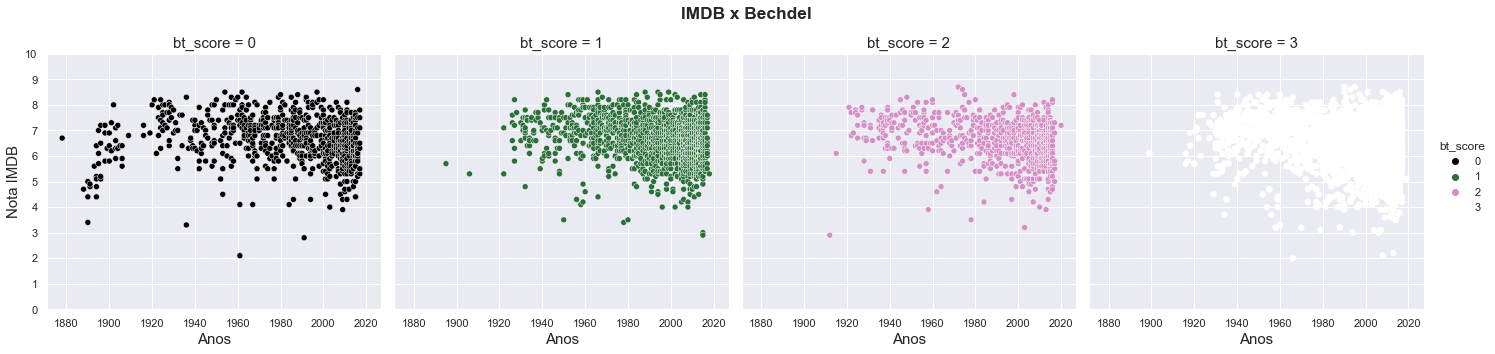

In [38]:
sns.set( rc = {'figure.figsize': (60, 60), 'axes.labelsize': 15}) 
g = sns.relplot(data = data, x = "year",  y = "vote_average", col = "bt_score", hue = "bt_score", palette="cubehelix") 
g.fig.suptitle("IMDB x Bechdel", fontsize = 'x-large', fontweight = 'bold') 
g.fig.subplots_adjust(top = 0.85) 
g.set_axis_labels("Anos" , "Nota IMDB") 
g.set(ylim=(0, 10))
g.set(yticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
plt.show()

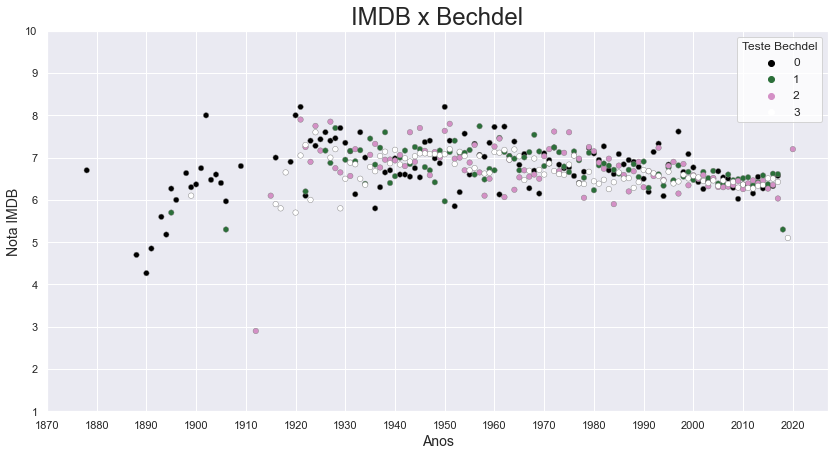

In [39]:
fig, ax = plt.subplots(figsize = (14 , 7))
sns.set_theme(style="ticks")
sns.set_style("white")
sns.scatterplot(y = "vote_average", x = 'year', hue = 'bt_score', data=imdb_bechdel, palette="cubehelix", s = 30, edgecolor=".5")
plt.legend(title = "Teste Bechdel", fontsize = '12', title_fontsize = "12")
ax.set_xlabel("Anos", size = 14) 
ax.set_ylabel("Nota IMDB", size = 14) 
ax.set_title("IMDB x Bechdel", size = 24) 
ax.set_xticks([1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

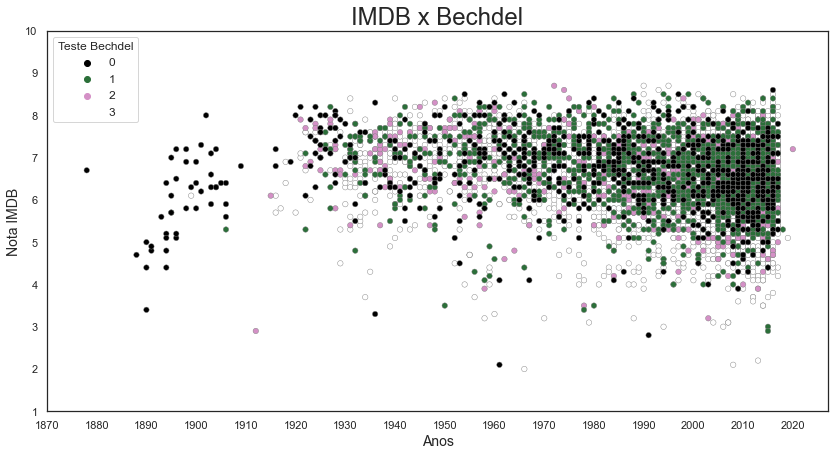

In [40]:
fig, ax = plt.subplots(figsize = (14 , 7))
sns.set_theme(style="ticks")
sns.set_style("white")
sns.scatterplot(y = "vote_average", x = 'year', hue = 'bt_score', data=data, palette="cubehelix", s = 30, edgecolor=".5")
plt.legend(title = "Teste Bechdel", fontsize = '12', title_fontsize = "12")
ax.set_xlabel("Anos", size = 14) 
ax.set_ylabel("Nota IMDB", size = 14) 
ax.set_title("IMDB x Bechdel", size = 24) 
ax.set_xticks([1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

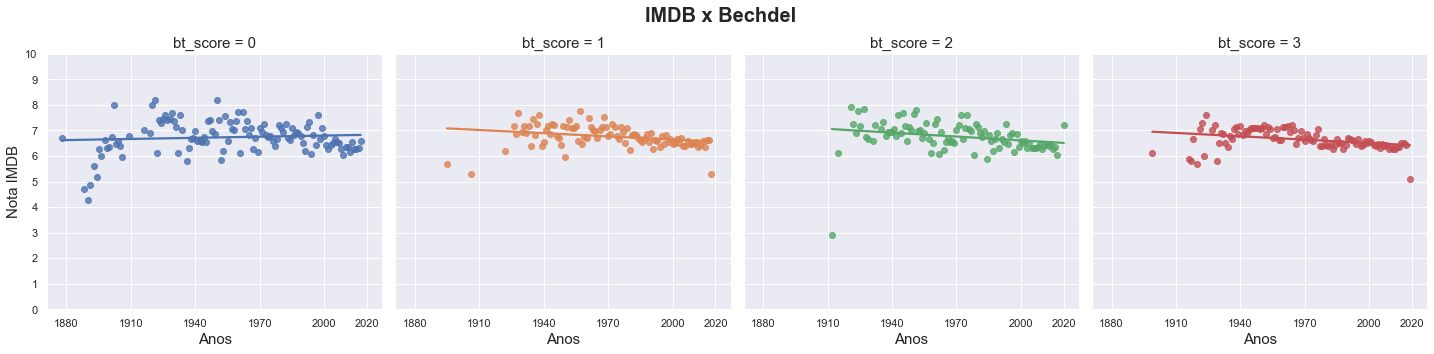

In [41]:
sns.set( rc = {'figure.figsize': (60, 60), 'axes.labelsize': 15})  
g = sns.lmplot(x = 'year', y = "vote_average", hue = 'bt_score', col = 'bt_score', data = imdb_bechdel, ci = None)
g.fig.suptitle("IMDB x Bechdel", fontsize = 20, fontweight = 'bold') 
g.fig.subplots_adjust(top = 0.85) 
g.set_axis_labels("Anos" , "Nota IMDB") 
g.set(ylim=(0, 10))
g.set(xticks=(1880, 1910, 1940, 1970, 2000, 2020), yticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
plt.show()

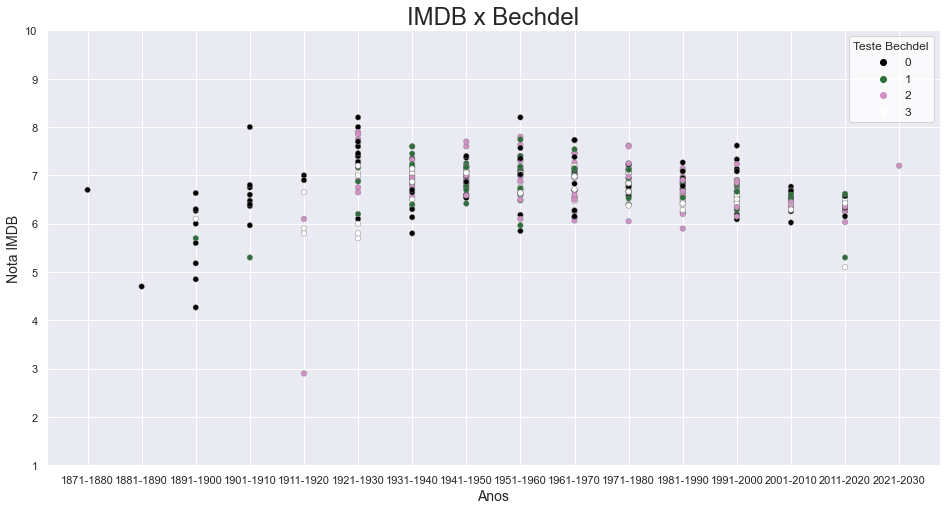

In [42]:
for index, year in imdb_bechdel['year'].iteritems():
    interval_start = int(year - year % 10 + 1)
    interval_end = int(interval_start + 9)
    imdb_bechdel.at[index, 'year_interval'] = str(interval_start) + '-' + str(interval_end)

fig, ax = plt.subplots(figsize = (16 , 8))
sns.set_theme(style="ticks")
sns.set_style("white")
sns.scatterplot(y = "vote_average", x = 'year_interval', hue = 'bt_score', data=imdb_bechdel, palette="cubehelix", s = 30, edgecolor=".5")
plt.legend(title = "Teste Bechdel", fontsize = '12', title_fontsize = "12")
ax.set_xlabel("Anos", size = 14) 
ax.set_ylabel("Nota IMDB", size = 14) 
ax.set_title("IMDB x Bechdel", size = 24) 
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

c:\ProgramData\Anaconda3\envs\cdia\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.


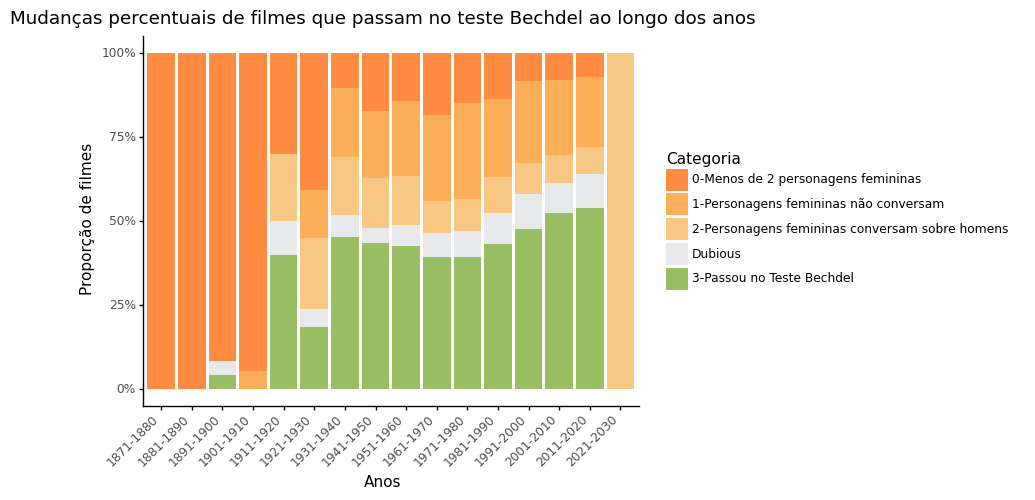

<ggplot: (76943903216)>

In [43]:
from plotnine import *
from mizani.formatters import percent_format

data2_df = data.copy()

for index, bt_score in data2_df['bt_score'].iteritems():
    if bt_score == 0:
        if data2_df.at[index, 'dubious'] == 1:
            data2_df.at[index, 'Categoria'] = 'Dubious'
        else:
            data2_df.at[index, 'Categoria'] = '0-Menos de 2 personagens femininas'
    elif bt_score == 1:
        if data2_df.at[index, 'dubious'] == 1:
            data2_df.at[index, 'Categoria'] = 'Dubious'
        else:
            data2_df.at[index, 'Categoria'] = '1-Personagens femininas não conversam'
    elif bt_score == 2:
        if data2_df.at[index, 'dubious'] == 1:
            data2_df.at[index, 'Categoria'] = 'Dubious'
        else:
            data2_df.at[index, 'Categoria'] = '2-Personagens femininas conversam sobre homens'
    else:
        if data2_df.at[index, 'dubious'] == 1:
            data2_df.at[index, 'Categoria'] = 'Dubious'
        else:
            data2_df.at[index, 'Categoria'] = '3-Passou no Teste Bechdel'
            
bechdel_df_ordered = data2_df.copy()
bechdel_df_ordered['Categoria'] = pd.Categorical(bechdel_df_ordered['Categoria'], categories=[
    '0-Menos de 2 personagens femininas', 
    '1-Personagens femininas não conversam',
    '2-Personagens femininas conversam sobre homens',
    'Dubious',
    '3-Passou no Teste Bechdel'
], ordered=True)

for index, year in bechdel_df_ordered['year'].iteritems():
    interval_start = int(year - year % 10 + 1)
    interval_end = int(interval_start + 9)
    bechdel_df_ordered.at[index, 'year_interval'] = str(interval_start) + '-' + str(interval_end)

(ggplot(bechdel_df_ordered, 
        aes(fill = 'Categoria', x = 'year_interval')) + 
    geom_bar(position = "fill") + 
    scale_y_continuous(labels=percent_format()) +
    scale_fill_manual(values = ['#FF8C42', '#FCAF58', '#F9C784', '#E8E9EB', '#98BF64']) +
    # geom_text(angle=45) + 
    labs(
        title = 'Mudanças percentuais de filmes que passam no teste Bechdel ao longo dos anos', 
        subtitle = 'Gráfico de barras de porcentagem empilhada',
        x = 'Anos', 
        y = 'Proporção de filmes'
    ) + 
    theme_classic() + 
    theme(axis_text_x  = element_text(angle = 45, hjust = 1))
)